# Dataset

For our dataset, we are using the 2015 version of the BRFSS survey, available on Kaggle here: https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system?select=2015.csv

In [104]:
import pandas as pd

# data was too large to put on github in 1 part, so I divided it into multiple parts
split_data_urls = ["https://media.githubusercontent.com/media/bshoots17/SSB_DSCI303/refs/heads/main/split_df_part_1.csv?token=BMTBML3XZ4SWJ3DKLAJRHCLHITKJ2",
                   "https://media.githubusercontent.com/media/bshoots17/SSB_DSCI303/refs/heads/main/split_df_part_2.csv?token=BMTBML55K7W5P43PI4PB6JLHITKJ6",
                   "https://media.githubusercontent.com/media/bshoots17/SSB_DSCI303/refs/heads/main/split_df_part_3.csv?token=BMTBMLZGF5X6LFI5LYBZEW3HITKR2",
                   "https://media.githubusercontent.com/media/bshoots17/SSB_DSCI303/refs/heads/main/split_df_part_4.csv?token=BMTBML6T6QH6I72AI44OYU3HITKH6",
                   "https://media.githubusercontent.com/media/bshoots17/SSB_DSCI303/refs/heads/main/split_df_part_5.csv?token=BMTBML4KHN7TVUDWCROJO4LHITKIC",
                   "https://media.githubusercontent.com/media/bshoots17/SSB_DSCI303/refs/heads/main/split_df_part_6.csv?token=BMTBML44PX2H3UEMHACIV4LHITKIG",
                   "https://media.githubusercontent.com/media/bshoots17/SSB_DSCI303/refs/heads/main/split_df_part_7.csv?token=BMTBMLY72453KGMIVBMOPMTHITKIM",
                   "https://media.githubusercontent.com/media/bshoots17/SSB_DSCI303/refs/heads/main/split_df_part_8.csv?token=BMTBML6JSDGCVYX377S4QBLHITKIQ",
                   "https://media.githubusercontent.com/media/bshoots17/SSB_DSCI303/refs/heads/main/split_df_part_9.csv?token=BMTBML2TB5UHAXS6FURHIBDHITKIU"]

dfs = []

# creating a list of dataframes
for url in split_data_urls:
    part = pd.read_csv(url)
    dfs.append(part)

# combining all dataframes into one
raw_data = pd.concat(dfs, ignore_index=True)

# ensuring it has all of the data
print(raw_data.shape)
raw_data.head()

(441456, 330)


,X_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,X_PSU,CTELENUM,...,X_PAREC1,X_PASTAE1,X_LMTACT1,X_LMTWRK1,X_LMTSCL1,X_RFSEAT2,X_RFSEAT3,X_FLSHOT6,X_PNEUMO2,X_AIDTST3
0,1,1,b'01292015',b'01',b'29',b'2015',1200,2015000001,2015000001,1.0,...,4,2,1.0,1.0,1.0,1,1,NaN,NaN,1.0
1,1,1,b'01202015',b'01',b'20',b'2015',1100,2015000002,2015000002,1.0,...,2,2,3.0,3.0,4.0,2,2,NaN,NaN,2.0
2,1,1,b'02012015',b'02',b'01',b'2015',1200,2015000003,2015000003,1.0,...,9,9,9.0,9.0,9.0,9,9,9.0,9.0,NaN
3,1,1,b'01142015',b'01',b'14',b'2015',1100,2015000004,2015000004,1.0,...,4,2,1.0,1.0,1.0,1,1,NaN,NaN,9.0
4,1,1,b'01142015',b'01',b'14',b'2015',1100,2015000005,2015000005,1.0,...,4,2,1.0,1.0,1.0,1,1,NaN,NaN,1.0


# Exploratory Data Analysis (EDA)

## Response Variables

The four variables below will be our response variables:

*   **CVDCRHD4** = : (Ever told) you had angina or coronary heart disease?
*   **DIABETE3** = (Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If
Respondent says pre-diabetes or borderline diabetes, use response code 4.)
*   **_ASTHMS1** = Computed asthma status (current, former, never)
*   **CHCOCNCR** = : (Ever told) you had any other types of cancer? (other than skin cancer)

In this section, we will plot the response variables to view their distributions. 

In [105]:
# Selecting the response variables
heart_disease = raw_data["CVDCRHD4"]
diabetes = raw_data["DIABETE3"]
asthma = raw_data["X_ASTHMS1"]
cancer = raw_data["CHCOCNCR"]

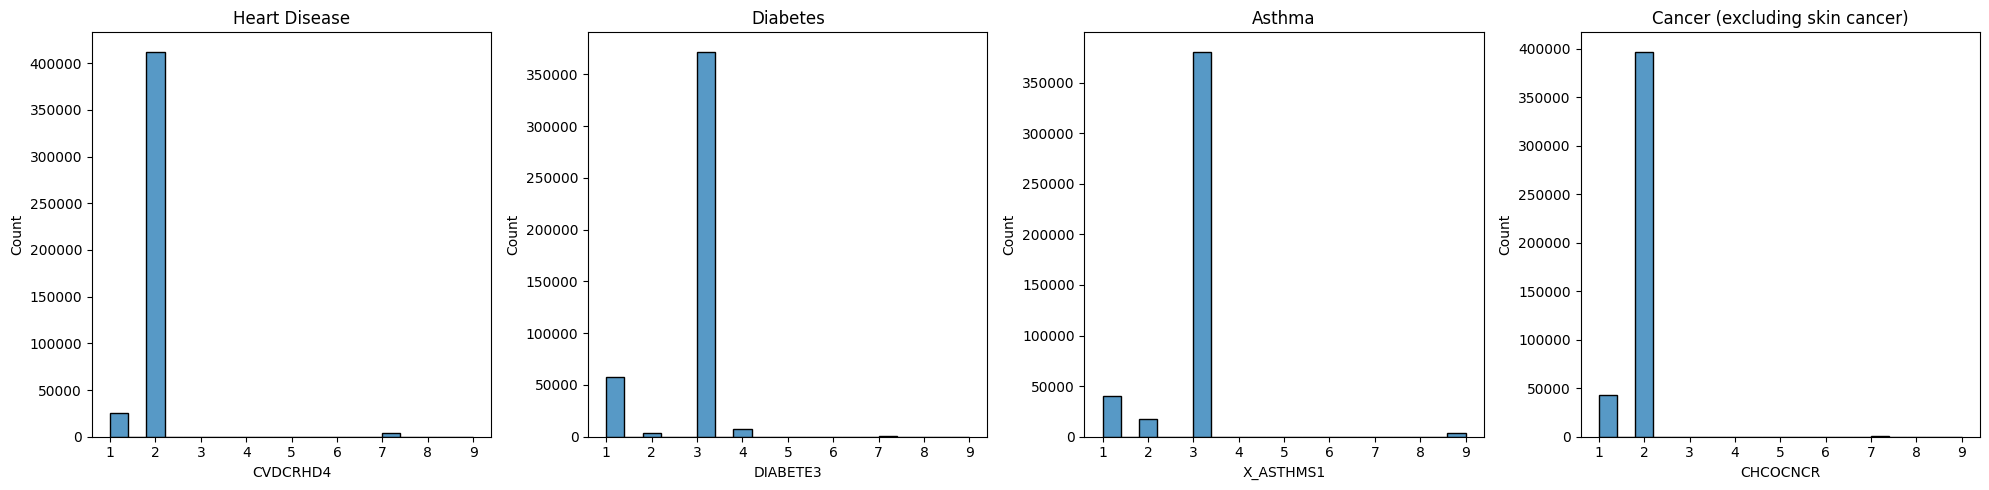

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

response_vars = [heart_disease, diabetes, asthma, cancer]
titles = ["Heart Disease", "Diabetes", "Asthma", "Cancer (excluding skin cancer)"]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, var, title in zip(axes, response_vars, titles):
    sns.histplot(var, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

We see here that there are major class imbalances between the group that doesn't have the disease (majority class) and those that do (minority class). To fix this, we tried both the "balanced" class_weight parameter and SMOTE from the imblearn package. We also used F1 as the metric to help improve the model's recognition of the minority class.

**SMOTE did a better job of improving accuracy in predicting the minority class.**

## Features

Below, we select features based on exercise, tobacco use, alcohol consumption, and diet as our initial features/independent variables. See descriptions of variables for explanations.

In [107]:
diet_vars = [
    "FTJUDA1_", # Fruit juice intake in times per day - 38,535 blanks
    "FRUTDA1_", # Fruit intake in times per day - 36582 blanks
    "BEANDAY_", # Bean intake in times per day - 39947 blanks
    "GRENDAY_", # Dark green vegetable intake in times per day - 37949 blanks
    "ORNGDAY_", # Orange-colored vegetable intake in times per day - 39258 blanks
    "VEGEDA1_" # Other vegetable intake in times per day - 41463 blanks
]
# there are 51117 total missing for vegetables, 43711 for fruit

demographic_vars = ["X_BMI5", # BMI - 36398 blanks
    "X_AGEG5YR", # 14-level age category (5336 missing)
    "X_EDUCAG", # 1811 blanks
    "X_INCOMG", # #79505 blanks
    "SEX", # no missing
    "EMPLOY1"] # no missing, but 9 is a blank essentially (refused) - RECODING DONE
# levels to employ1 are employed for wages, self employed,
# out of work for 1+ year, out of work for less than a year, homemaker, student,
# retired, unable to work, refused

tobacco_vars = ["X_SMOKER3"] # smoker3 is a calculation of smokday2 and smoke100
# need to remove 9s, those are the blanks - RECODED

exercise_vars = ["X_TOTINDA", # Adults who reported doing physical activity or exercise during the past 30 days other than their regular job - recoded
                 "ACTIN11_", # intensity of first (and second below) activities
                 "ACTIN21_",
                 "X_MINAC11", # minutes per week of first (and second below) activities
                 "X_MINAC21",
                 "PAFREQ1_", # frequency per week of first activity, 3 implied decimals
                 "PAFREQ2_",
                 "STRFREQ_", # strength activity frequency per wk
                 "PA1MIN_" # total activity per week
]
# from X_TOTINDA, remove 9.
# blanks for ACTIN11 and 21 should be recoded to 0 (if not asked or missing, they likely didn't do activity)
# recode MINAC blanks to be 0 minutes per week
# blanks for pafreq1 and 2 should also be recoded to be 0
# blanks for strfreq should be removed or recoded to 0
# blanks on PA1MIN are a significant amount, will need to recode to be 0


alc_vars = ["X_DRNKWEK", # num of beverages per week - 25733 blanks, remove
            "X_RFBING5", # binge drinkers - 9 needs to be blank, removed
            "X_RFDRHV5" # heavy drinkers - 9 needs to be blank, removed
]

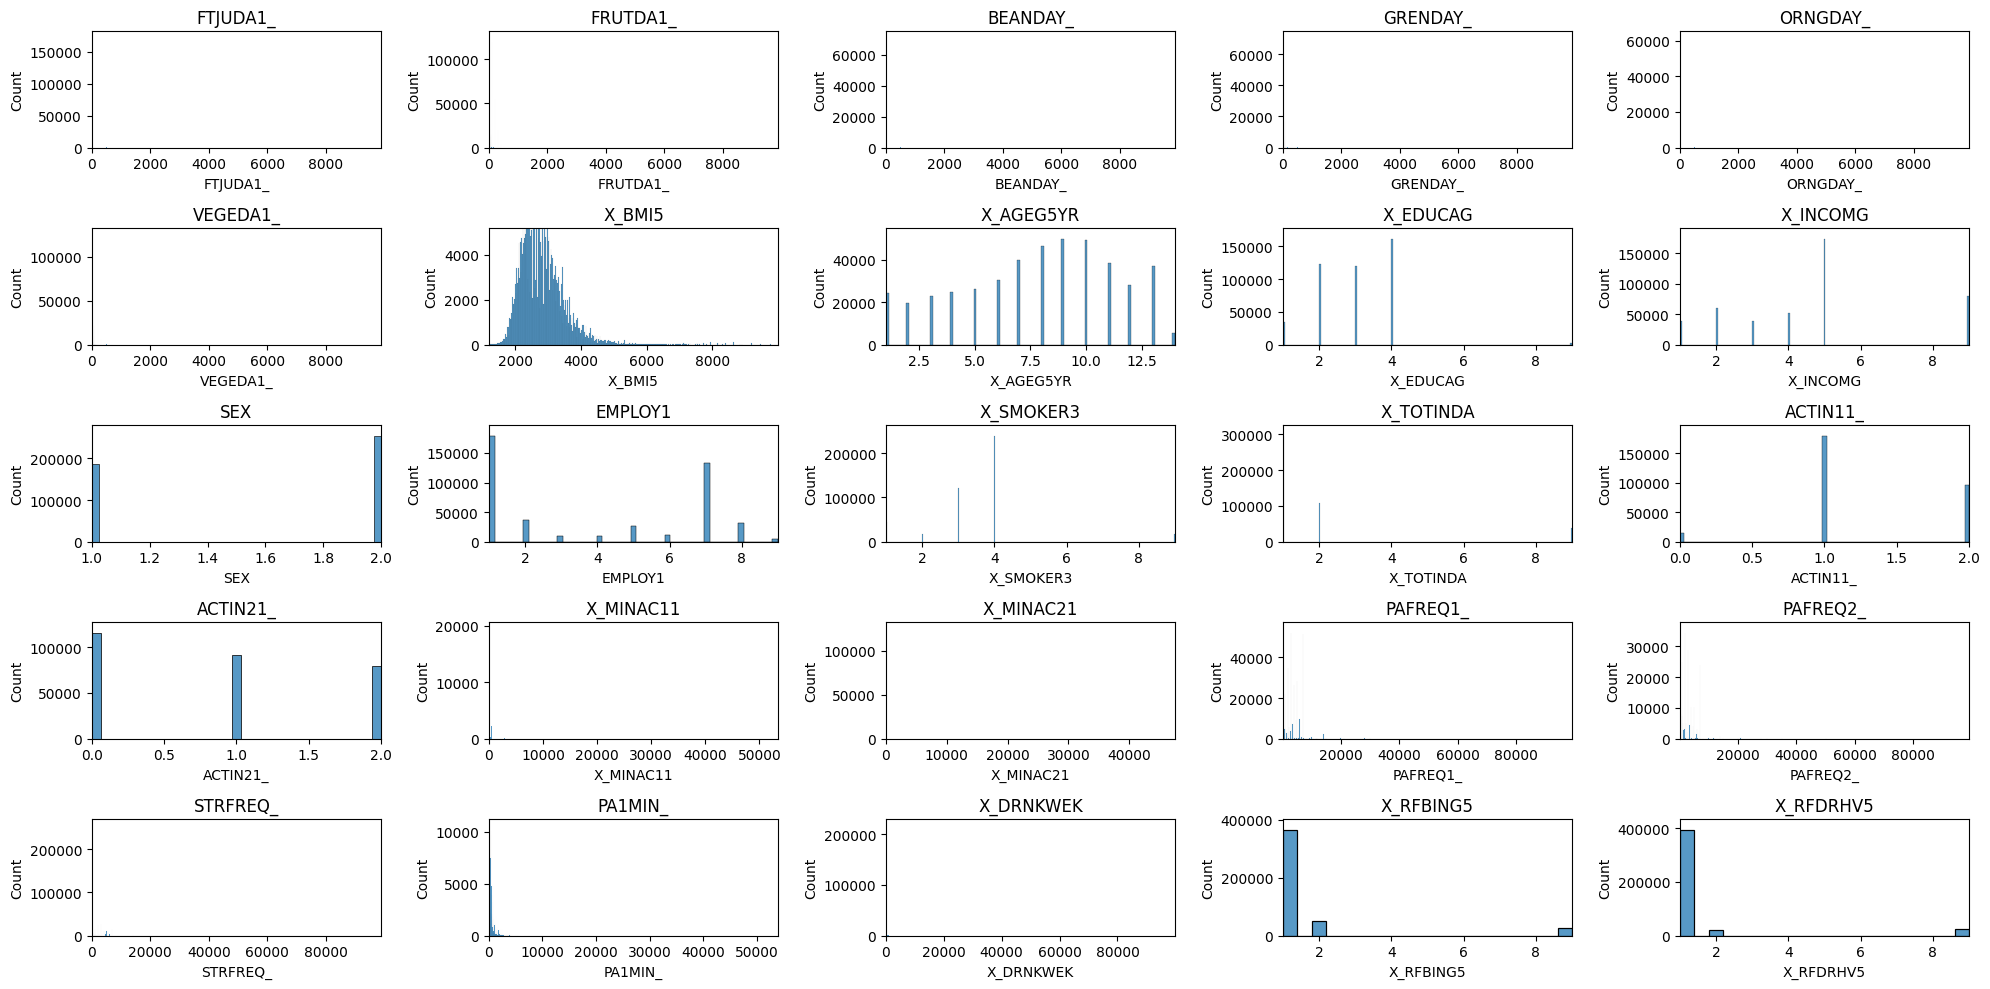

In [108]:
all_vars = [diet_vars, demographic_vars, tobacco_vars, exercise_vars, alc_vars]

all_columns = sum(all_vars, [])

fig, axes = plt.subplots(5, 5, figsize=(20, 10)) 

axes = axes.flatten()

for i in range(len(all_columns)):
    var = all_columns[i]
    sns.histplot(raw_data[var], ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_xlim(raw_data[var].min(), raw_data[var].max()) 
    axes[i].set_ylim(0, raw_data[var].value_counts().max() * 1.1)

# Adjust layout

plt.tight_layout()
plt.show()

# Data Cleaning

## Response Variable

Recode to exclude any NAs and 7s or 9s, which are "don't know" or "didn't respond"

In [109]:
# HEART DISEASE --> RECODING TO EXCLUDE NAs, 7s and 9s
print(raw_data['CVDCRHD4'].value_counts())
raw_data['CVDCRHD4'] = raw_data['CVDCRHD4'].fillna(0)

# removing all non 1 and 2 values
heart_disease = raw_data[raw_data.CVDCRHD4.isin([1, 2])]
print(heart_disease['CVDCRHD4'].value_counts())

# now recode to be 0 and 1

heart_disease.loc[:, 'CVDCRHD4'] = heart_disease['CVDCRHD4'].replace({2: 0}) # 2 is no --> making it 0
print(heart_disease['CVDCRHD4'].value_counts()) # fixed

# DIABETES --> RECODING TO EXCLUDE NAs, 7s and 9s
print(raw_data['DIABETE3'].value_counts())
raw_data['DIABETE3'] = raw_data['DIABETE3'].fillna(0)

# removing all non 1 and 2 values
diabetes = raw_data[raw_data.DIABETE3.isin([1, 3])]
print(diabetes['DIABETE3'].value_counts())

# now recode to be 0 and 1

diabetes.loc[:, 'DIABETE3'] = diabetes['DIABETE3'].replace({3: 0}) # 3 is no, so exclude that
print(diabetes['DIABETE3'].value_counts()) # fixed

# note that a '4' is prediabetes, might be useful to look at in a multiclass task (Random forests?)


# ASTHMA --> RECODING TO EXCLUDE NAs, 7s and 9s
print(raw_data['X_ASTHMS1'].value_counts())
raw_data['X_ASTHMS1'] = raw_data['X_ASTHMS1'].fillna(0)

# removing all non 1 and 2 values
asthma = raw_data[raw_data.X_ASTHMS1.isin([1, 3])]
print(asthma['X_ASTHMS1'].value_counts())

# now recode to be 0 and 1

asthma.loc[:, 'X_ASTHMS1'] = asthma['X_ASTHMS1'].replace({3: 0}) # 3 is no --> making it 0
print(asthma['X_ASTHMS1'].value_counts()) # fixed

# note that there are 17600 responses of people with former diabetes, again might be worth to look at


# NON SKIN CANCER --> RECODING TO EXCLUDE NAs, 7s and 9s
print(raw_data['CHCOCNCR'].value_counts())
raw_data['CHCOCNCR'] = raw_data['CHCOCNCR'].fillna(0)

# removing all non 1 and 2 values
cancer = raw_data[raw_data.CHCOCNCR.isin([1, 2])]
print(cancer['CHCOCNCR'].value_counts())

# now recode to be 0 and 1

cancer.loc[:, 'CHCOCNCR'] = cancer['CHCOCNCR'].replace({2: 0}) # 2 is no --> making it 0
print(cancer['CHCOCNCR'].value_counts()) # fixed


CVDCRHD4
2.0    412349
1.0     25290
7.0      3591
9.0       225
Name: count, dtype: int64
CVDCRHD4
2.0    412349
1.0     25290
Name: count, dtype: int64
CVDCRHD4
0.0    412349
1.0     25290
Name: count, dtype: int64
DIABETE3
3.0    372104
1.0     57256
4.0      7690
2.0      3608
7.0       598
9.0       193
Name: count, dtype: int64
DIABETE3
3.0    372104
1.0     57256
Name: count, dtype: int64
DIABETE3
0.0    372104
1.0     57256
Name: count, dtype: int64
X_ASTHMS1
3    380554
1     40000
2     17600
9      3302
Name: count, dtype: int64
X_ASTHMS1
3    380554
1     40000
Name: count, dtype: int64
X_ASTHMS1
0    380554
1     40000
Name: count, dtype: int64
CHCOCNCR
2    396932
1     43441
7       888
9       195
Name: count, dtype: int64
CHCOCNCR
2    396932
1     43441
Name: count, dtype: int64
CHCOCNCR
0    396932
1     43441
Name: count, dtype: int64


In [110]:
# Get ratios
cancer_counts = cancer['CHCOCNCR'].value_counts()
cancer_ratios = cancer_counts / sum(cancer_counts)

asthma_counts = asthma['X_ASTHMS1'].value_counts()
asthma_ratios = asthma_counts / sum(asthma_counts)

heart_counts = heart_disease['CVDCRHD4'].value_counts()
heart_ratios = heart_counts / sum(heart_counts)

diabetes_counts = diabetes['DIABETE3'].value_counts()
diabetes_ratios = diabetes_counts / sum(diabetes_counts)

print(cancer_ratios, asthma_ratios, heart_ratios, diabetes_ratios)

CHCOCNCR
0    0.901354
1    0.098646
Name: count, dtype: float64 X_ASTHMS1
0    0.904887
1    0.095113
Name: count, dtype: float64 CVDCRHD4
0.0    0.942213
1.0    0.057787
Name: count, dtype: float64 DIABETE3
0.0    0.866648
1.0    0.133352
Name: count, dtype: float64


## Features

In [111]:
# Creating a raw data set with only the features and response variable for each disease
datasets = [heart_disease, asthma, cancer, diabetes]
all_vars = [diet_vars, demographic_vars, tobacco_vars, exercise_vars, alc_vars]
y_vars = ["CVDCRHD4", "X_ASTHMS1", "CHCOCNCR", "DIABETE3"]

def flatten(xss):
    return [x for xs in xss for x in xs]

all_vars = flatten(all_vars)

for idx in range(len(datasets)):
  d = datasets[idx]
  var = [y_vars[idx]]
  new_data = d[flatten([all_vars, var])]
  datasets[idx] = new_data
  print(datasets[idx].shape)

heart_disease = datasets[0]
asthma = datasets[1]
cancer = datasets[2]
diabetes = datasets[3]

(437639, 26)
(420554, 26)
(440373, 26)
(429360, 26)


There are 0 strongly correlated values with CVDCRHD4: Series([], Name: CVDCRHD4, dtype: float64)
There are 0 strongly correlated values with X_ASTHMS1: Series([], Name: X_ASTHMS1, dtype: float64)
There are 0 strongly correlated values with CHCOCNCR: Series([], Name: CHCOCNCR, dtype: float64)
There are 0 strongly correlated values with DIABETE3: Series([], Name: DIABETE3, dtype: float64)


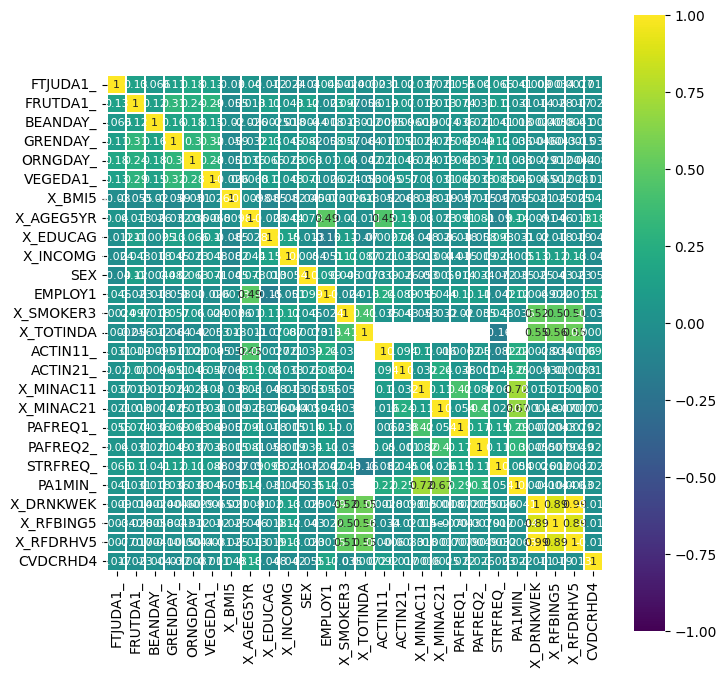

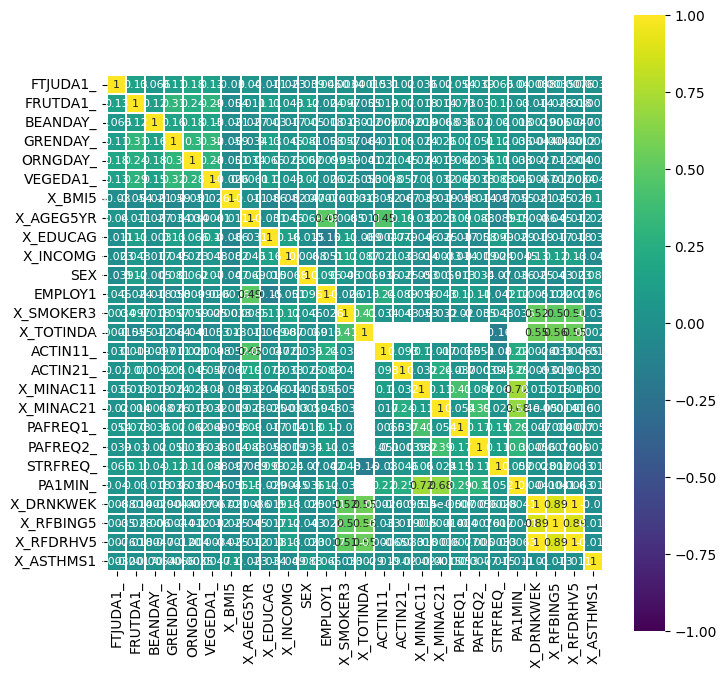

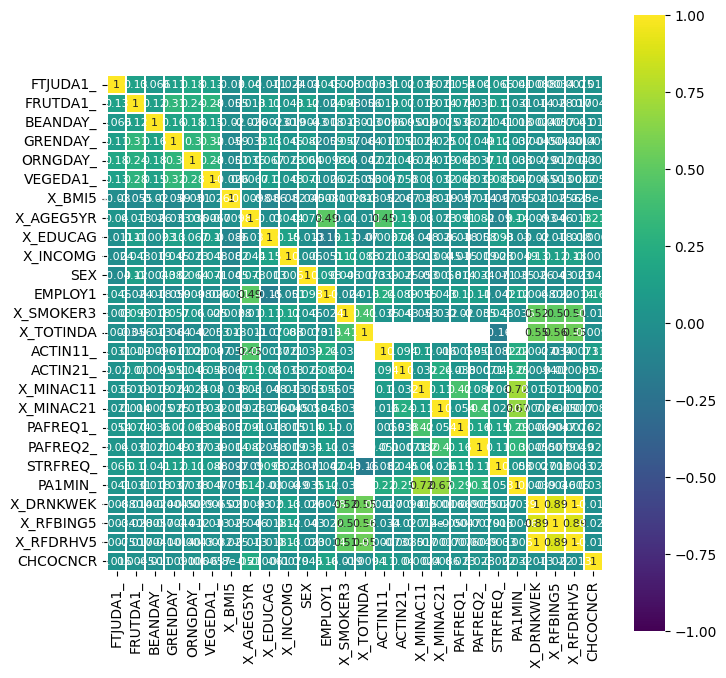

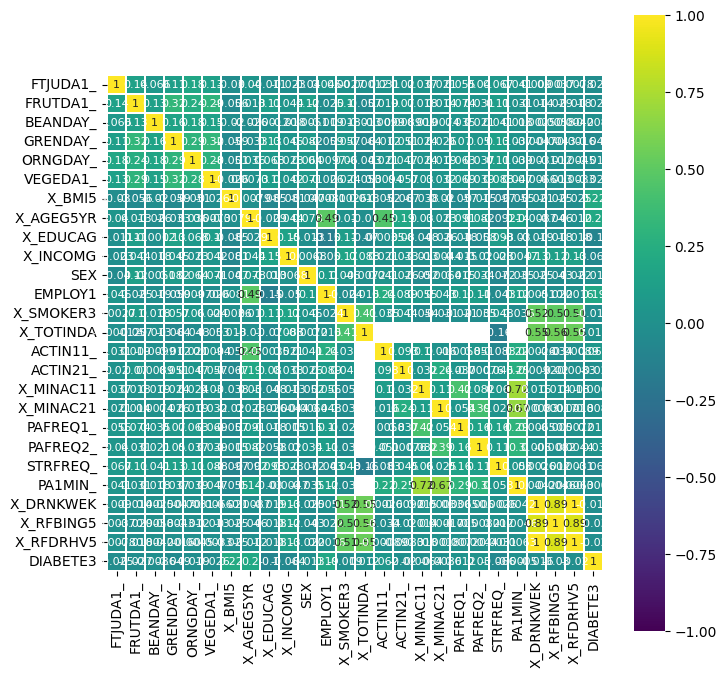

In [112]:
# Looking at correlations between the relevant disease variable and the features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for idx in range(len(datasets)):
  d = datasets[idx]
  correlation_matrix = d.corr()
  var = y_vars[idx]

  plt.figure(figsize=(8, 8))

  sns.heatmap(correlation_matrix,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
  df_corr = correlation_matrix[var].drop(var)
  golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
  print(f"There are {len(golden_features_list)} strongly correlated values with {var}:", golden_features_list)
plt.show()

### Removing NAs

For some variables, there are few NAs (which are mostly not actually NAs, they are 9s) so we can remove them.

For others, there are NAs because that question was asked only if people said yes to a prior question, so we can code them along with "none" or "no" for subsequent questions since it's a significant portion of the observations.

In [113]:
# remove NAs and recode certain variables
import numpy as np
for idx in range(len(datasets)):
  data = datasets[idx]
  # to allow for NAs to remove them
  data = data.astype({col: 'Int64' for col in data.select_dtypes(include='int64').columns})
  data.loc[:, 'EMPLOY1'] = data['EMPLOY1'].replace({9: np.nan}) 
  data.loc[:, 'X_SMOKER3'] = data['X_SMOKER3'].replace({9: np.nan})
  data.loc[:, 'X_TOTINDA'] = data['X_TOTINDA'].replace({9: np.nan}) 
  data.loc[:, 'X_DRNKWEK'] = data['X_DRNKWEK'].replace({99900: np.nan})
  data.loc[:, 'X_RFBING5'] = data['X_RFBING5'].replace({9: np.nan})
  data.loc[:, 'X_RFDRHV5'] = data['X_RFDRHV5'].replace({9: np.nan})

  # activity variables have too many NAs to remove because 
  # if they said no to first activity question, others weren't asked
  # SO instead, replacing blanks w zeros for these because the NAs are mostly 
  # because the respondent said they did not exercise (aka = 0)
  data['ACTIN11_'] = data['ACTIN11_'].fillna(0)
  data['ACTIN21_'] = data['ACTIN21_'].fillna(0)
  data['PAFREQ1_'] = data['PAFREQ1_'].fillna(0)
  data['PAFREQ2_'] = data['PAFREQ2_'].fillna(0)
  data['PAFREQ2_'] = data['PAFREQ2_'].fillna(0)
  data['X_MINAC11'] = data['X_MINAC11'].fillna(0)
  data['X_MINAC21'] = data['X_MINAC21'].fillna(0)
  data['PA1MIN_'] = data['PA1MIN_'].fillna(0)
  print("before", data.shape)
  data = data.dropna()
  print("after", data.shape)
  datasets[idx] = data

heart_disease = datasets[0]
asthma = datasets[1]
cancer = datasets[2]
diabetes = datasets[3]

print("NAs:", datasets[0].isna().sum().sum())
print("NAs:", asthma.isna().sum().sum())
print("NAs:", cancer.isna().sum().sum())
print("NAs:", diabetes.isna().sum().sum()) # no more NAs

before (437639, 26)
after (341587, 26)
before (420554, 26)
after (327720, 26)
before (440373, 26)
after (343514, 26)
before (429360, 26)
after (334970, 26)
NAs: 0
NAs: 0
NAs: 0
NAs: 0


### Renaming Variables

These variable names are difficult to interpret and it would be better to see what they mean in model results. To fix this, we will rename them appropriately. 

In [114]:
# final cleaning - coding dummies for multiple class variables, and renaming them

def renaming(data):
    new_names = {
        'FTJUDA1_': 'fruitJuicePerDay',
        'FRUTDA1_': 'fruitIntakePerDay',
        'BEANDAY_': 'beansPerDay',
        'GRENDAY_': 'greensPerDay',
        'ORNGDAY_': 'orangeVegPerDay',
        'VEGEDAY1_': 'otherVegPerDay',
        'X_BMI5': 'BMI',
        'X_AGEG5YR': 'Age',
        'X_EDUCAG': 'EducationLevel',
        'X_INCOMG': 'IncomeLevel',
        'SEX': 'isFemale',
        'EMPLOY1': 'EmploymentStatus',
        'X_SMOKER3': 'SmokerStatus',
        'X_TOTINDA': 'ExerciseLast30Days',
        'ACTIN11_': 'IntensityActivity1',
        'ACTIN21_': 'IntensityActivity2',
        'X_MINAC11': 'MinPerWeekActivity1',
        'X_MINAC21': 'MinPerWeekActivity2',
        'PAFREQ1_': 'TimesPerWeekActivity1',
        'PAFREQ2_': 'TimesPerWeekActivity2',
        'STRFREQ_': 'StrengthPerWeek',
        'PA1MIN_': 'TotalActiveMinsPerWeek',
        'X_DRNKWEK': 'AlcDrinksPerWeek',
        'X_RFBING5': 'isBingeDrinker',
        'X_RFDRHV5': 'isHeavyDrinker'
    }
    data.rename(columns=new_names, inplace=True)
    return data


heart_disease = renaming(heart_disease)
asthma = renaming(asthma)
cancer = renaming(cancer)
diabetes = renaming(diabetes)

# Logistic Regression

For each disease, our goal is to perform a binary classification task. To do this, we used logistic regression. 

## Heart Disease

### Basic Logistic Regression Model and Data Set-Up

We utilize upsampling and standardization to ensure our data recognizes the minority class and to improve its performance. 

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = heart_disease.drop('CVDCRHD4', axis = 1)

y = heart_disease['CVDCRHD4']

y = y.astype(int)

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state = 42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42) # sampling to help with class imbalances

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# standardizing for logistic regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# running a basic model
model = LogisticRegression(class_weight='balanced')
model = model.fit(X_train_scaled, y_train_res)

y_pred = model.predict(X_test_scaled)
model_accuracy  = accuracy_score(y_pred,y_test)
print("The Accuracy of simple logistic regression without hyperparmeter:",model_accuracy) # only 50% accuracy and failed to converge, try something else

/Users/biancaschutz/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/biancaschutz/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


The Accuracy of simple logistic regression without hyperparmeter: 0.7454243123294729


### Grid Search - Hyperparameter Tuning

Note: cell is commented out because it takes ~2 hours to run, depending on whether you're running it in parallel and the number of cores. 

In [ ]:
# import numpy as np
# param_grid = [
#     {'penalty':['l1','l2','elasticnet','none'],
#     'C' : np.logspace(-4,4,20),
#     'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter'  : [100,1000,2500,5000],
#     'class_weight': ['balanced']
# }
# ]

# from sklearn.model_selection import GridSearchCV

# new_model = LogisticRegression()

# clf = GridSearchCV(new_model, param_grid = param_grid, cv = 3, verbose=3,n_jobs=-1)

# clf.fit(X_train_scaled, y_train_res)

# # Get the best parameters and model
# print(f"Best parameters found: {clf.best_params_}")
# print(f"Best score found: {clf.best_score_}")

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Use the best estimator to predict the test set
# y_pred = clf.best_estimator_.predict(X_test_scaled)

# # Compute accuracy on the test set
# test_accuracy = accuracy_score(y_test, y_pred)
# print(f"Test set accuracy: {test_accuracy:.4f}")

# # Print the confusion matrix and classification report
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# importance = clf.best_estimator_.coef_[0]
# #plt.bar([x for x in range(len(importance))], importance)

# #plt.title("Importance")
# #plt.show()

# table = pd.DataFrame({'feature': X.columns,'importance': importance})
# table_sorted = table.sort_values(by = 'importance', ascending = False)

# print(table_sorted)

## Asthma

### Basic Logistic Regression and Set-up

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = asthma.drop('X_ASTHMS1', axis = 1)

y = asthma['X_ASTHMS1']

y = y.astype(int)

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state = 42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42) # sampling to help with class imbalances

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# standardizing for logistic regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# running a basic model
model = LogisticRegression(class_weight='balanced')
model = model.fit(X_train_scaled, y_train_res)

y_pred = model.predict(X_test_scaled)
model_accuracy  = accuracy_score(y_pred,y_test)
print("The Accuracy of simple logistic regression without hyperparameter:",model_accuracy)

/Users/biancaschutz/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/biancaschutz/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


The Accuracy of simple logistic regression without hyperparameter: 0.6517942145734164


### Grid Search

In [118]:
# import numpy as np
# param_grid = [
#     {'penalty':['l1','l2','elasticnet','none'],
#     'C' : np.logspace(-4,4,20),
#     'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter'  : [100,1000,2500,5000],
#     'class_weight': ['balanced']
# }
# ]

# from sklearn.model_selection import GridSearchCV

# new_model = LogisticRegression()

# clf = GridSearchCV(new_model, param_grid = param_grid, cv = 5, verbose=3,n_jobs=-1)

# clf.fit(X_train_scaled, y_train_res)

# # Get the best parameters and model
# print(f"Best parameters (asthma) found: {clf.best_params_}")
# print(f"Best score (asthma) found: {clf.best_score_}")

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Use the best estimator to predict the test set
# y_pred = clf.best_estimator_.predict(X_test_scaled)

# # Compute accuracy on the test set
# test_accuracy = accuracy_score(y_test, y_pred)
# print(f"Test set accuracy: {test_accuracy:.4f}")

# # Print the confusion matrix and classification report
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# importance = clf.best_estimator_.coef_[0]
# #plt.bar([x for x in range(len(importance))], importance)

# #plt.title("Importance")
# #plt.show()

# table = pd.DataFrame({'feature': X.columns,'importance': importance})
# table_sorted = table.sort_values(by = 'importance', ascending = False)

# print(table_sorted)

## Cancer

### Basic Logistic Regression and Set-up

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = cancer.drop('CHCOCNCR', axis = 1)

y = cancer['CHCOCNCR']

y = y.astype(int)

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state = 42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42) # sampling to help with class imbalances

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# standardizing for logistic regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# running a basic model
model = LogisticRegression(class_weight='balanced')
model = model.fit(X_train_scaled, y_train_res)

y_pred = model.predict(X_test_scaled)
model_accuracy  = accuracy_score(y_pred,y_test)
print("The Accuracy of simple logistic regression without hyperparameter:",model_accuracy)

/Users/biancaschutz/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/biancaschutz/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


The Accuracy of simple logistic regression without hyperparameter: 0.6452720995359723


### Grid Search

In [121]:
# import numpy as np
# param_grid = [
#     {'penalty':['l1','l2','elasticnet','none'],
#     'C' : np.logspace(-4,4,20),
#     'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter'  : [100,1000,2500,5000],
#     'class_weight': ['balanced']
# }
# ]

# from sklearn.model_selection import GridSearchCV

# new_model = LogisticRegression()

# clf = GridSearchCV(new_model, param_grid = param_grid, cv = 3, verbose=3,n_jobs=-1)

# clf.fit(X_train_scaled, y_train_res)

# # Get the best parameters and model
# print(f"Best parameters found (cancer): {clf.best_params_}")
# print(f"Best score found (cancer): {clf.best_score_}")

In [ ]:
# import numpy as np
# param_grid = [
#     {'penalty':['l1','l2','elasticnet','none'],
#     'C' : np.logspace(-4,4,20),
#     'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter'  : [100,1000,2500,5000],
#     'class_weight': ['balanced']
# }
# ]

# from sklearn.model_selection import GridSearchCV

# new_model = LogisticRegression()

# clf = GridSearchCV(new_model, param_grid = param_grid, cv = 3, verbose=3,n_jobs=-1)

# clf.fit(X_train_scaled, y_train_res)

# # Get the best parameters and model
# print(f"Best parameters found (cancer): {clf.best_params_}")
# print(f"Best score found (cancer): {clf.best_score_}")

# importance = clf.best_estimator_.coef_[0]
# #plt.bar([x for x in range(len(importance))], importance)

# #plt.title("Importance")
# #plt.show()

# table = pd.DataFrame({'feature': X.columns,'importance': importance})
# table_sorted = table.sort_values(by = 'importance', ascending = False)

# print(table_sorted)

## Diabetes

### Basic Logistic Regression and Set-up

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = diabetes.drop('DIABETE3', axis = 1)

y = diabetes['DIABETE3']

y = y.astype(int)

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state = 42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42) # sampling to help with class imbalances

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# standardizing for logistic regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# running a basic model
model = LogisticRegression(class_weight='balanced')
model = model.fit(X_train_scaled, y_train_res)

y_pred = model.predict(X_test_scaled)
model_accuracy  = accuracy_score(y_pred,y_test)
print("The Accuracy of simple logistic regression without hyperparameter:",model_accuracy)

/Users/biancaschutz/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/biancaschutz/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


The Accuracy of simple logistic regression without hyperparameter: 0.7292294832373049


### Grid Search

In [ ]:
# import numpy as np
# param_grid = [
#     {'penalty':['l1','l2','elasticnet','none'],
#     'C' : np.logspace(-4,4,20),
#     'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter'  : [100,1000,2500,5000],
#     'class_weight': ['balanced']
# }
# ]

# from sklearn.model_selection import GridSearchCV

# new_model = LogisticRegression()

# clf = GridSearchCV(new_model, param_grid = param_grid, cv = 3, verbose=3,n_jobs=-1)

# clf.fit(X_train_scaled, y_train_res)

# # Get the best parameters and model
# print(f"Best parameters (diabetes) found: {clf.best_params_}")
# print(f"Best score (diabetes) found: {clf.best_score_}")

# importance = clf.best_estimator_.coef_[0]
# #plt.bar([x for x in range(len(importance))], importance)

# #plt.title("Importance")
# #plt.show()

# table = pd.DataFrame({'feature': X.columns,'importance': importance})
# table_sorted = table.sort_values(by = 'importance', ascending = False)

# print(table_sorted)

# Confusion Matrix:
# [[153790   6814]
#  [  8885   1305]]

# Classification Report:
#               precision    recall  f1-score   support

#            0       0.95      0.96      0.95    160604
#            1       0.16      0.13      0.14     10190

#     accuracy                           0.91    170794
#    macro avg       0.55      0.54      0.55    170794
# weighted avg       0.90      0.91      0.90    170794

In [125]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Use the best estimator to predict the test set
# y_pred = clf.best_estimator_.predict(X_test_scaled)

# # Compute accuracy on the test set
# test_accuracy = accuracy_score(y_test, y_pred)
# print(f"Test set accuracy: {test_accuracy:.4f}")

# # Print the confusion matrix and classification report
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# Random Forests

## Setting up the data
Using heart disease as an example. 

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc

X = heart_disease.drop('CVDCRHD4', axis = 1)

y = heart_disease['CVDCRHD4']

y = y.astype(int)

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state = 42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

/Users/biancaschutz/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/biancaschutz/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## Running a basic model

In [127]:
model = RandomForestClassifier(verbose = 3)
model = model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("The Accuracy of the Random Forest:", model_accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# Precision-Recall AUC Score
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print("Precision-Recall AUC Score:", pr_auc)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:   12.0s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.6s


The Accuracy of the Random Forest: 0.8978711195943652
Confusion Matrix:
 [[151687   8917]
 [  8526   1664]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95    160604
           1       0.16      0.16      0.16     10190

    accuracy                           0.90    170794
   macro avg       0.55      0.55      0.55    170794
weighted avg       0.90      0.90      0.90    170794



[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.7s


ROC AUC Score: 0.7480838331373648


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.6s


Precision-Recall AUC Score: 0.13176002773283568


## Grid Search RFs

In [ ]:
from sklearn.model_selection import GridSearchCV
params_pool = {
    'n_estimators': [50, 100, 200, 300, 500], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [10, 20, 30, 50, None], 
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20], 
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

gsearch = GridSearchCV(estimator = RandomForestClassifier(),
       param_grid = params_pool, scoring='f1',cv=5, verbose=1, n_jobs = -1)

gsearch.fit(X_train_res, y_train_res)

y_pred = gsearch.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("The Accuracy of the Random Forest:", model_accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, gsearch.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# Precision-Recall AUC Score
precision, recall, _ = precision_recall_curve(y_test, gsearch.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print("Precision-Recall AUC Score:", pr_auc)

print(f"Best parameters found: {gsearch.best_params_}")

# Confusion Matrix:
# [[153790   6814]
#  [  8885   1305]]

# Classification Report:
#               precision    recall  f1-score   support

#            0       0.95      0.96      0.95    160604
#            1       0.16      0.13      0.14     10190

#     accuracy                           0.91    170794
#    macro avg       0.55      0.54      0.55    170794
# weighted avg       0.90      0.91      0.90    170794

# Looking at SMOTE

To see if SMOTE is actually helping our models, we will test the data with and without SMOTE, and using different class weights in the logistic regression modeling.

In [129]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def testing_SMOTE(X, y, is_SMOTE):
    """
    Inputs are data frames that are already split into X and y.
    Function will split into training and test set with .5 split.
    The is_SMOTE input is either True or False, depending on whether SMOTE should be used.
    """
    counts = y.value_counts()
    ratio = counts / sum(counts)
    test_ratios = ['balanced', {0:(ratio[0]), 1:(ratio[1])}, {0:(ratio[0] - .05), 1:(ratio[1] + .05)}, {0:(ratio[0] - .1), 1:(ratio[1] + .1)}, {0:(ratio[0] - .2), 1:(ratio[1] + .2)}, {0:(ratio[0] - .3), 1:(ratio[1] + .3)}, {0:(ratio[0] - .4), 1:(ratio[1] + .4)}]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state = 42)
    if is_SMOTE:
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        # Apply SMOTE to the training data 
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_res)
        X_test_scaled = scaler.transform(X_test)
        # because solver didn't really seem to impact, we will try different solvers
        # because l2 was by far the best penalty parameter, we will only use the l2 penalty
        param_grid = [{'penalty':['l2'],
                       'C' : np.logspace(-4,4,20),
                       'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
                       'max_iter'  : [100,1000,2500,5000],
                       'class_weight': test_ratios
                       
}]
        new_model = LogisticRegression()

        clf = GridSearchCV(new_model, param_grid = param_grid, cv = 3, verbose=3,n_jobs=-1, refit = 'f1', scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
})         
        clf.fit(X_train_scaled, y_train_res)
        y_pred = clf.best_estimator_.predict(X_test_scaled)
        conf_mat = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        return [clf.best_params_, conf_mat, cr]
    
    if not is_SMOTE:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        # because solver didn't really seem to impact, we will try different solvers
        # because l2 was by far the best penalty parameter, we will only use the l2 penalty
        param_grid = [{'penalty':['l2'],
                       'C' : np.logspace(-4,4,20),
                       'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
                       'max_iter'  : [100,1000,2500,5000],
                       'class_weight': test_ratios
                       
}]
        new_model = LogisticRegression()

        clf = GridSearchCV(new_model, param_grid = param_grid, cv = 3, verbose=1,n_jobs=-1, refit = 'f1', scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
})         
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.best_estimator_.predict(X_test_scaled)
        conf_mat = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        return [clf.best_params_, conf_mat, cr]



In [ ]:
X = diabetes.drop('DIABETE3', axis = 1)

y = diabetes['DIABETE3']

y = y.astype(int)

X = X.astype(int)

# d_SMOTE_results = testing_SMOTE(X, y, True)
# d_noSMOTE_results = testing_SMOTE(X, y, False)

# SMOTE
# {'C': np.float64(0.00026366508987303583), 'class_weight': {0: np.float64(0.4667134370242111), 1: np.float64(0.5332865629757889)}, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
# [[102961  42332]
#  [  7194  14998]]
#               precision    recall  f1-score   support

#            0       0.93      0.71      0.81    145293
#            1       0.26      0.68      0.38     22192

#     accuracy                           0.70    167485
#    macro avg       0.60      0.69      0.59    167485
# weighted avg       0.85      0.70      0.75    167485

# no SMOTE
# {'C': np.float64(0.012742749857031334), 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
# [[100477  44816]
#  [  5788  16404]]
#               precision    recall  f1-score   support

#            0       0.95      0.69      0.80    145293
#            1       0.27      0.74      0.39     22192

#     accuracy                           0.70    167485
#    macro avg       0.61      0.72      0.60    167485
# weighted avg       0.86      0.70      0.75    167485